In [215]:
import utlis
import math
import numpy as np
import matplotlib.pyplot as plt

In [216]:
n=5
step=0.05
num_of_samples_per_bit_1=math.ceil(1/step)

In [217]:
# Step(1) Generate Binary Source 
# 0s and 1s with equal Probabilities 0.5
nums = np.random.choice([0, 1], size=n, p=[.5,.5])
print(nums)

[1 0 0 1 0]


In [218]:
def binarycode_to_signal(bitstream, step):
    T = 1  # assume the pulse period is 1
    A = 1  # assume the amplitude is 1
    pulse = np.ones(math.ceil(T/step)) * A
    # pulse = pulse*A
    signal = np.zeros(len(bitstream)*len(pulse))
    # Polar nonreturn to zero
    for i in range(len(bitstream)):
        if bitstream[i] == 1:
            signal[i*len(pulse):(i+1)*len(pulse)] = 1*pulse    # take the shape of pulse along the symbol's interval
        else:
            signal[i*len(pulse):(i+1)*len(pulse)] = -1*pulse
    return signal  

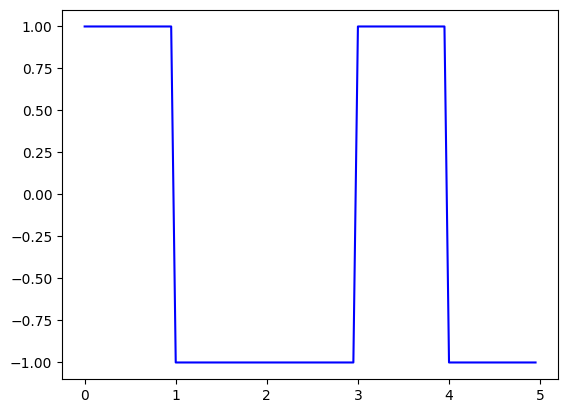

In [219]:
t=np.arange(0,n,step)
signal=binarycode_to_signal(nums, 0.05)#step=0.05 Question
plt.plot(t, signal, '-b')

In [220]:
def add_noise(generated_bits, sigma,n=10,step=0.05):
    """
    it is expanding generated_bits so each sample change to train of pulses to discretization the pulse
    then adding gussian noise for expanded array.
    Parameters: 
    generated_bits : it is array of random bits represrnt bits.
    sigma : standard deviation of noise distribution.
    return:
    scaled_samples : array of samples
    scaled_samples_with_noise : array of bits and added noise.
    """
    generated_noise = np.random.normal(loc=0, scale=sigma, size=n*math.ceil(1/step))

    scaled_samples_with_noise = np.ones((generated_bits.shape[0], math.ceil(1/step)))
    scaled_samples = np.ones((generated_bits.shape[0], math.ceil(1/step)))
    for i in range(generated_bits.shape[0]):
        scaled_samples[i, :] *= generated_bits[i]
        scaled_samples_with_noise[i, :] *= generated_bits[i]
        scaled_samples_with_noise[i, :] += generated_noise[i* math.ceil(1/step):(i+1)* math.ceil(1/step)]
    return scaled_samples, scaled_samples_with_noise


def calc_c(scaled_samples_with_noise, received_filter,num_of_bits,num_of_samples_per_bit):
    """
    it calculates convolution for received_filter and each sample
    Parameters:
    scaled_samples_with_noise : array of bits and added noise.
    received_filter : this is filter on the recevier side
    return:
    convolution_result : array of smaples that represent output of matched filter
    convolution_result_sampled_Tp : array of smaples that represent output of matched filter after sampling at TP
    """
    convolution_result_sampled_Tp = np.zeros(num_of_bits)
    
    if(received_filter is None):
        convolution_result = scaled_samples_with_noise.flatten()
    else:
        convolution_result = np.convolve(scaled_samples_with_noise.flatten(), received_filter)
    for i in range(num_of_bits):
        convolution_result_sampled_Tp[i] = convolution_result[(num_of_samples_per_bit - 1) + num_of_samples_per_bit * i]

    return convolution_result, convolution_result_sampled_Tp


def calc_simulated_BER(true_bits, convolution_result):
    """
    it is thresholding convolution_result with lamda optimum
    then calculates probability of error
    (BER => Bit Error Rate) 
    Parameters:
    true_bits : actual bits that transmitter send it
    convolution_result : this is array of recived filtered bits
    return:
    error_probability : probability of error in recieving bits 
    """
    # applying lamda thresholed (lamda optimum = 0)
    received_samples = np.ones(true_bits.shape[0])
    received_samples += (-2 * (convolution_result < 0))

    # calculate probability of error
    error_probability = np.sum(received_samples != true_bits)
    error_probability /= true_bits.shape[0]
    return error_probability


def calc_theoretical_BER(erfc_parameter):
    """
    it calculates probability of error using erfc function
    return:
    error_probability : theoretical probability of error in recieving bits 
    """
    return math.erfc(erfc_parameter)# Question multiply with half

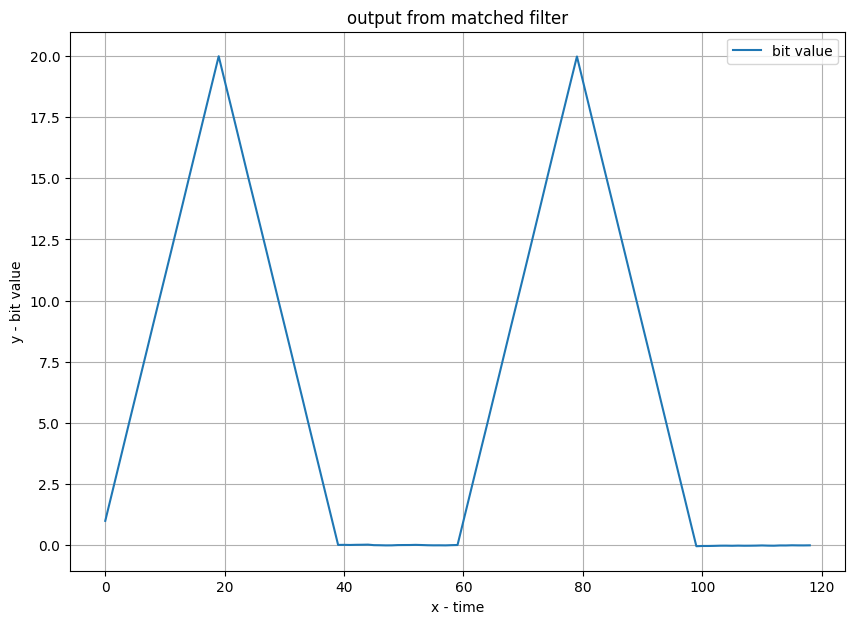

In [221]:

# receive with matched filter
received_filter_matched_1 = np.ones(num_of_samples_per_bit_1)
E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = add_noise(nums, E/(2*E_div_N0))
    filtered_samples, filtered_bits = calc_c(received_samples, received_filter_matched_1,n,num_of_samples_per_bit_1)
#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output from matched filter')

plt.legend()
plt.grid()
plt.show()

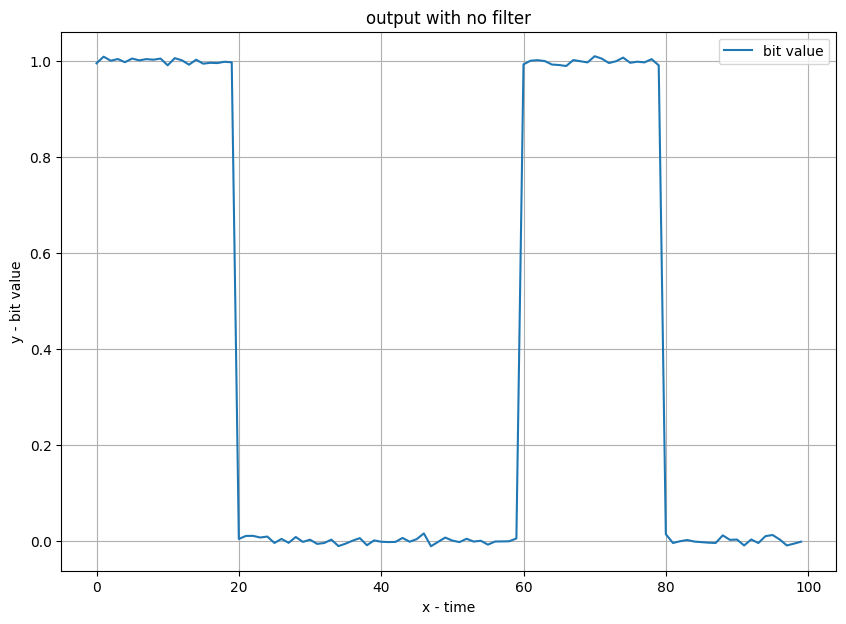

In [222]:

# receive with no filter
received_filter_matched_2 = None
E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = add_noise(nums, E/(2*E_div_N0))
    filtered_samples, filtered_bits = calc_c(received_samples, received_filter_matched_2,n,num_of_samples_per_bit_1)

#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output with no filter')

plt.legend()
plt.grid()
plt.show()

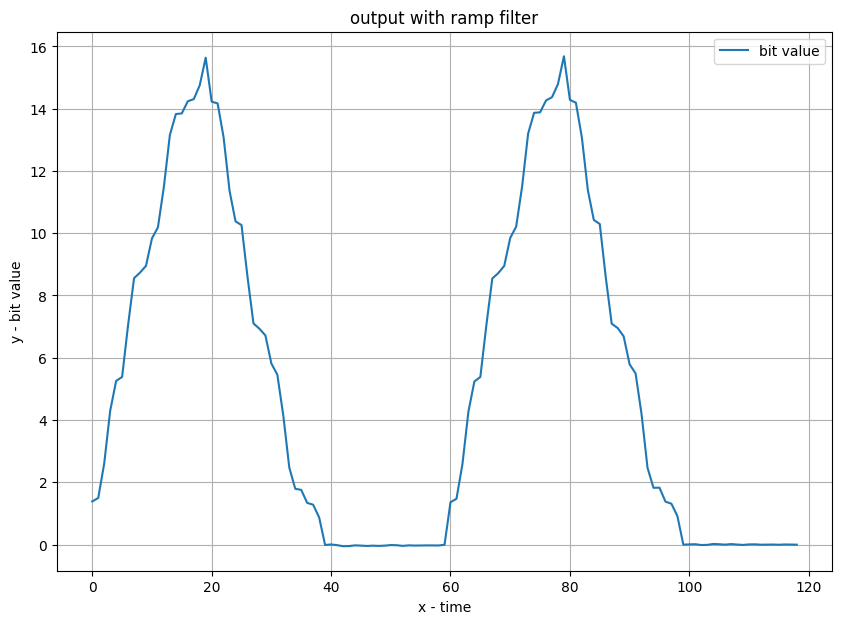

In [223]:

# receive with ramp filter
received_filter_ramp_3 = np.random.uniform(low=0, high=3**0.5, size=num_of_samples_per_bit_1)
E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = add_noise(nums, E/(2*E_div_N0))
    filtered_samples, filtered_bits = calc_c(received_samples, received_filter_ramp_3,n,num_of_samples_per_bit_1)
#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output with ramp filter')

plt.legend()
plt.grid()
plt.show() 

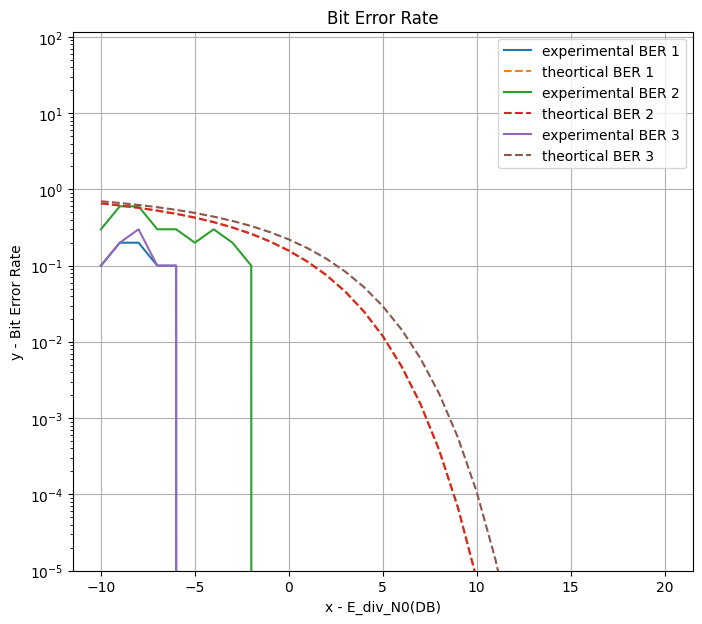

In [224]:
# constants
num_of_bits = 10
num_of_samples_per_bit = 20

# generate random bits
nums_binary = np.random.choice([-1, 1], size=(num_of_bits), p=[1./2, 1./2])

# receive with matched filter
received_filter_matched = np.ones(num_of_samples_per_bit)
BER_experimental_1_BER = []
BER_theortical_1_BRE = []

# receive with no filter
received_filter_empty = None
BER_experimental_2_BER = []
BER_theortical_2_BER = []

# receive with ramp filter
received_filter_ramp = np.random.uniform(low=0, high=3**0.5, size=num_of_samples_per_bit)
BER_experimental_3_BER = []
BER_theortical_3_BER = []

E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = add_noise(nums_binary, E/(2*E_div_N0))
    filtered_samples1, filtered_bits1 = calc_c(received_samples, received_filter_matched,num_of_bits,num_of_samples_per_bit)
    filtered_samples2, filtered_bits2 = calc_c(received_samples, received_filter_empty,num_of_bits,num_of_samples_per_bit)
    filtered_samples3, filtered_bits3 = calc_c(received_samples, received_filter_ramp,num_of_bits,num_of_samples_per_bit)

    BER_experimental_1_BER.append(calc_simulated_BER(nums_binary, filtered_bits1))
    BER_theortical_1_BRE.append(calc_theoretical_BER(E_div_N0 ** 0.5))

    BER_experimental_2_BER.append(calc_simulated_BER(nums_binary, filtered_bits2))
    BER_theortical_2_BER.append(calc_theoretical_BER(E_div_N0 ** 0.5))

    BER_experimental_3_BER.append(calc_simulated_BER(nums_binary, filtered_bits3))
    BER_theortical_3_BER.append(calc_theoretical_BER((3**0.5/2) * E_div_N0 ** 0.5))
    #ploting
plt.figure(figsize=(8,7))
plt.plot(range(-10, 21), BER_experimental_1_BER, label = "experimental BER 1")
plt.plot(range(-10, 21), BER_theortical_1_BRE, "--", label = "theortical BER 1")

plt.plot(range(-10, 21), BER_experimental_2_BER, label = "experimental BER 2")
plt.plot(range(-10, 21), BER_theortical_2_BER, "--", label = "theortical BER 2")

plt.plot(range(-10, 21), BER_experimental_3_BER, label = "experimental BER 3")
plt.plot(range(-10, 21), BER_theortical_3_BER, "--", label = "theortical BER 3")

plt.xlabel('x - E_div_N0(DB)')
plt.ylabel('y - Bit Error Rate')
plt.yscale('log')
plt.ylim(10**(-5))
plt.title('Bit Error Rate')

plt.legend()
plt.grid()
plt.show()
